In [1]:
import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import adfuller
from matplotlib import pyplot
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy import stats
import warnings
from itertools import product
from datetime import datetime
warnings.filterwarnings('ignore')
plt.style.use('seaborn-poster')

In [2]:
btc = pd.read_csv('./Data/BTC-USD(PB).csv')

In [3]:
# Ajout d'un nom pour la col 'Date' et Convertion en datetime et index

btc.rename(columns={'Unnamed: 0':'Date'}, inplace=True)
btc['Date'] = pd.to_datetime(btc.Date)

In [4]:
#Set Date as Index
btc.set_index('Date', inplace=True)

In [5]:
# Selecting only the dates from 2017-01-01 onwards when Bitcoin popularity increased.
#btc = btc[['close']].loc['2017-01-01':]

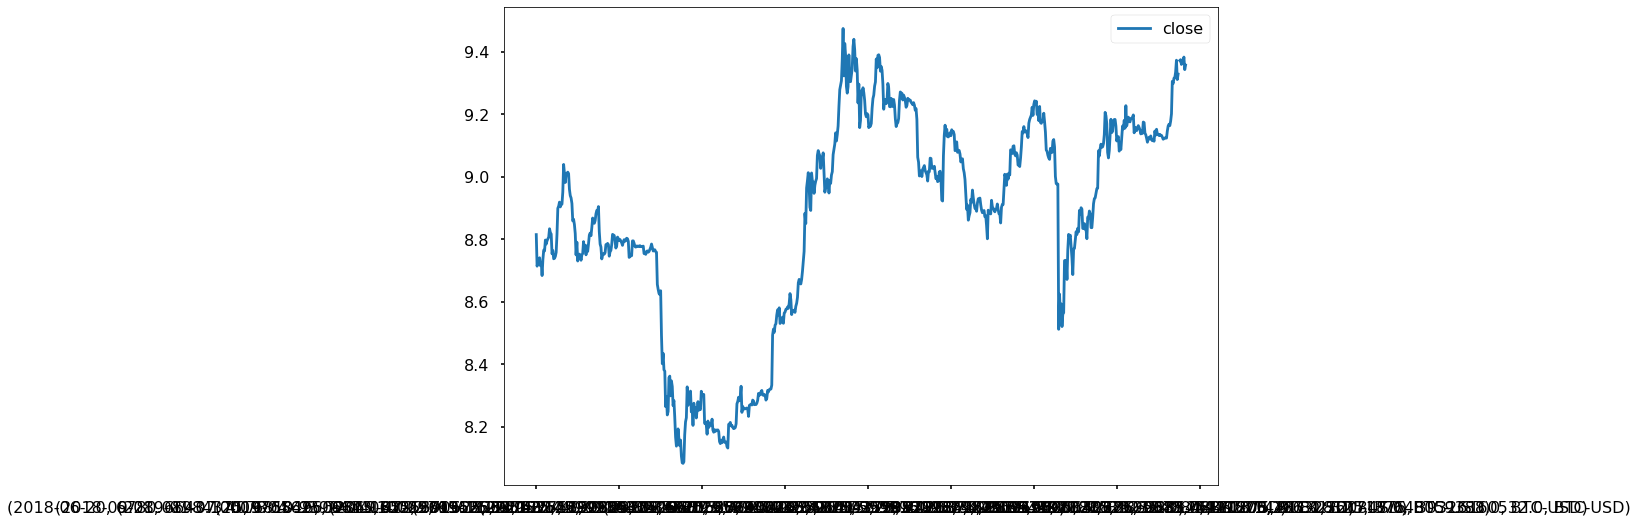

In [8]:
# Converting the data to a logarithmic scale
btc_log = pd.DataFrame(np.log(btc.close))

btc_log.plot()

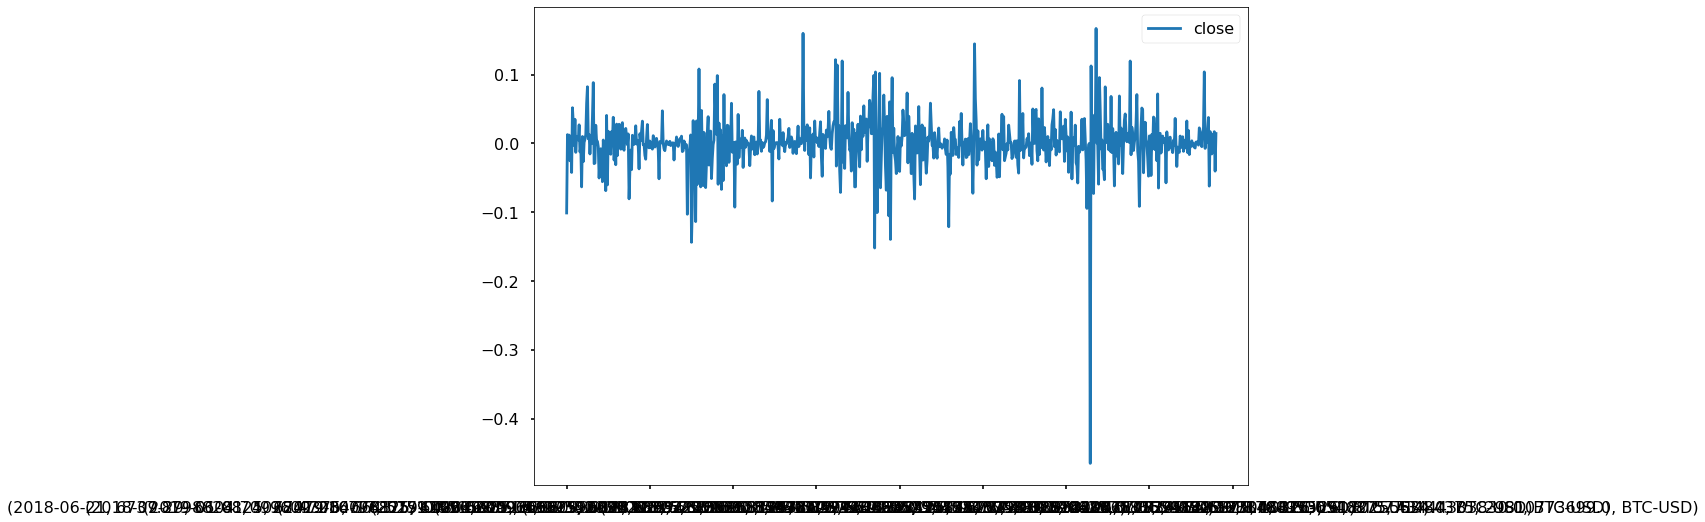

In [9]:
# Differencing the log values
log_diff = btc_log.diff().dropna()
log_diff.plot()

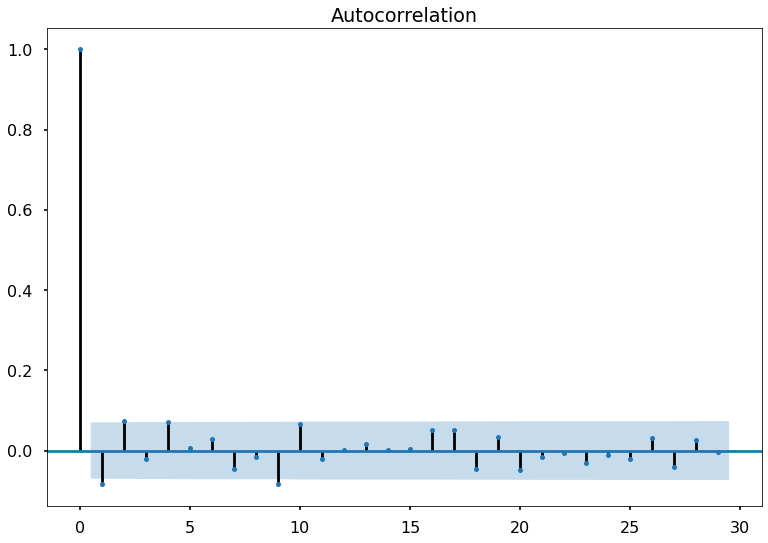

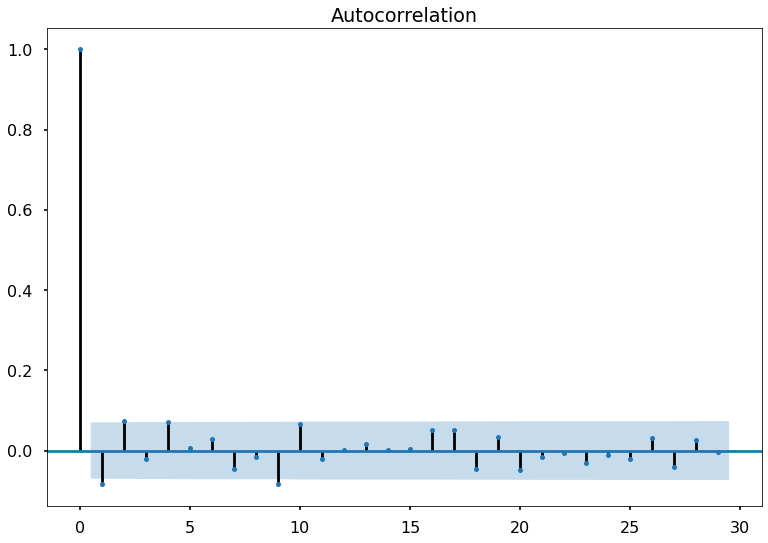

In [11]:
#ACF (Auto Correlation Function)
plot_acf(log_diff)

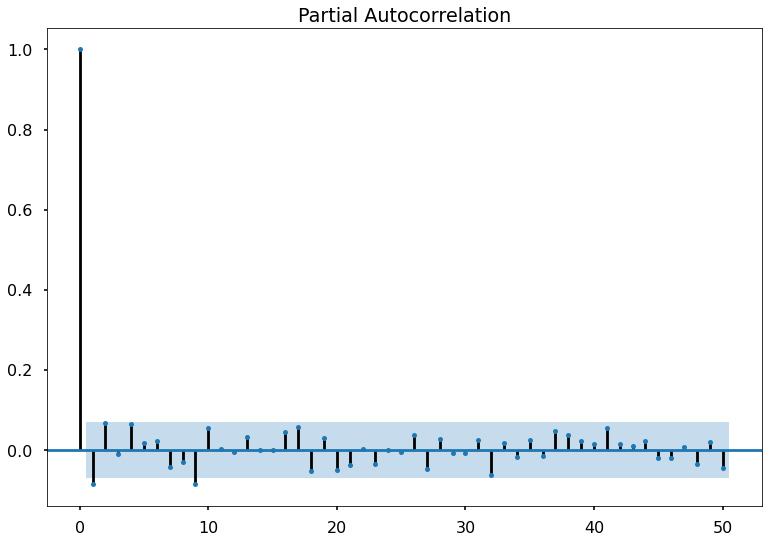

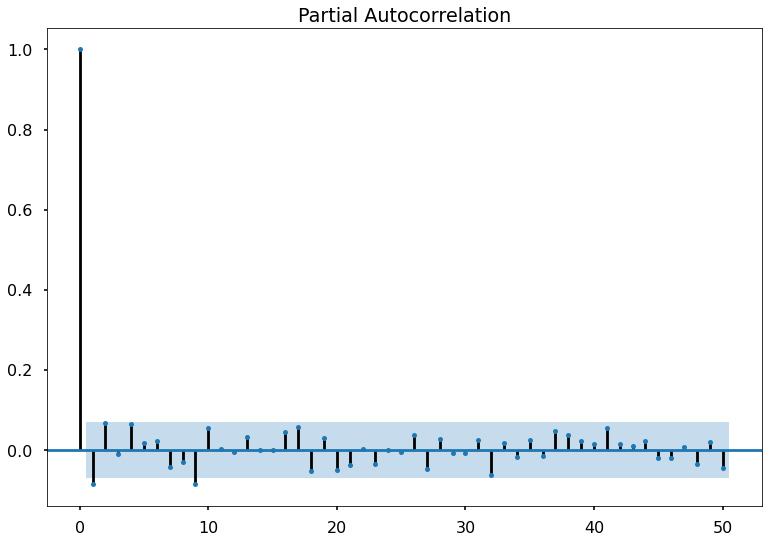

In [12]:
#PACF (Partial Autocorrelation Function)
plot_pacf(log_diff, lags=50)


In [5]:
# Resampling to daily frequency
btc = btc.resample('D').mean()

In [11]:
# Resampling to monthly frequency
btc_month = btc.resample('M').mean()

In [7]:
# Resampling to annual frequency
btc_year = btc.resample('A-DEC').mean()

In [8]:
# Resampling to quarterly frequency
btc_Q = btc.resample('Q-DEC').mean()

In [9]:
print(btc_Q)

open          high           low         close  \
Date                                                                 
2018-06-30   6269.041815   6375.870916   6099.863681   6232.789062   
2018-09-30   6820.392387   6944.088379   6699.288043   6823.531839   
2018-12-31   5216.086187   5299.927434   5103.376454   5184.820932   
2019-03-31   3794.686374   3842.230840   3754.253121   3799.623763   
2019-06-30   7300.459628   7553.214216   7125.777086   7372.050084   
2019-09-30  10381.304852  10597.857740  10092.735930  10357.307585   
2019-12-31   8028.084408   8169.571810   7882.355437   8015.803346   
2020-03-31   8280.419020   8462.000483   8071.660763   8272.424853   
2020-06-30   8665.840917   8840.230555   8517.047454   8694.399881   
2020-09-30  10075.554140  10258.001548   9951.609542  10135.157655   

                adjclose        volume  
Date                                    
2018-06-30   6232.789062  4.131832e+09  
2018-09-30   6823.531839  4.377096e+09  
2018-12-31   51

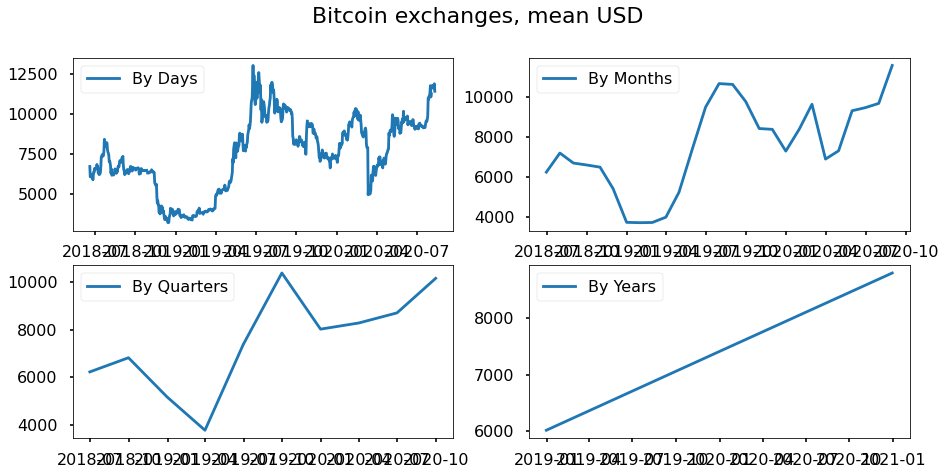

In [12]:
# PLOTS
fig = plt.figure(figsize=[15, 7])
plt.suptitle('Bitcoin exchanges, mean USD', fontsize=22)

plt.subplot(221)
plt.plot(btc.adjclose, '-', label='By Days')
plt.legend()

plt.subplot(222)
plt.plot(btc_month.adjclose, '-', label='By Months')
plt.legend()

plt.subplot(223)
plt.plot(btc_Q.adjclose, '-', label='By Quarters')
plt.legend()

plt.subplot(224)
plt.plot(btc_year.adjclose, '-', label='By Years')
plt.legend()

# plt.tight_layout()
plt.show()

Dickey–Fuller test: P-value = 0.388314


<Figure size 1080x504 with 0 Axes>

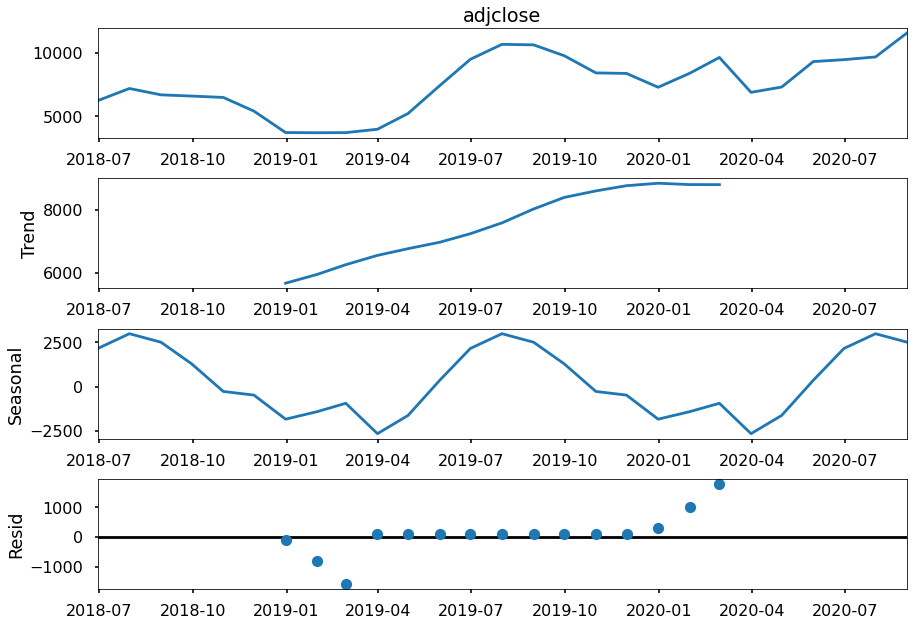

In [14]:
plt.figure(figsize=[15,7])
sm.tsa.seasonal_decompose(btc_month.adjclose).plot()
print("Dickey–Fuller test: P-value = %f" % sm.tsa.stattools.adfuller(btc_month.adjclose)[1])
plt.show()

In [ ]:
#Observation : la serie n'est pas stationnaire